<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/QwQ_Project_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Automated Traffic Volume Counts

This project aims to study the volume of traffic in NYC at bridge crossings and roadways. The dataset consists of 14 columns and 27.4M rows. It is considered as big data and occupies 3.33GB of memory. The dataset is obtained from Kaggle. We have selected this dataset because we like to analyze the traffic volume in NYC. We will perform a series of steps like data processing, data cleaning and visualization on this dataset. Google Colab will be used in this project.

**Team Members:**

1.   MUHAMMAD DINIE HAZIM BIN AZALI
2.   RADIN DAFINA BINTI RADIN ZULKAR NAIN
3.   ADRINA ASYIQIN BINTI MD ADHA
4.   KELVIN EE

## Downloading the Dataset

 

*   This dataset contains all traffic sample volume counts at bridge crossings and roadways.
*   However, these counts do not cover the entire year, and the number of days counted per location may vary from year to year.
*   There are 27.2M samples and 14 feature variables in this dataset.
*   The size of dataset is 3.33GB.

Columns in this dataset:

|Column Name |	Description |	Type |
|---|---|---|
|**RequestID**|An unique ID that is generated for each counts request.|	Number |
|**Boro**|Lists which of the five administrative divisions of New York City the location is within, written as a word|Plain Text|
|**Yr**|The two digit year portion of the date when the count was conducted.|	Number|
|**M**|The two digit month portion of the date when the count was conducted.|	Number|
|**D**|The two digit day portion of the date when the count was conducted.|	Number|
|**HH**|The two digit hour portion of the time when the count was conducted.|	Number|
|**MM**|The two digit start minute portion of the time when the count was conducted.|Number|
|**Vol**|The total sum of count collected within a 15 minute increments.|Number|
|**SegmentID**|The ID that identifies each segment of a street in the LION street network version 14.|Number|
|**WktGeom**|A text markup language for representing vector geometry objects on a map and spatial reference systems of spatial objects.|Plain Text|
|**street**|The 'On Street' where the count took place.|Plain Text|
|**fromSt**|The 'From Street' where the count took place.|Plain Text|
|**toSt**|The 'To Street' where the count took place.|Plain Text|
|**Direction**|The text-based direction of traffic where the count took place.|	Plain Text|

**Step 1**

Download the dataset from [Kaggle](https://www.kaggle.com/datasets/aadimator/nyc-automated-traffic-volume-counts), which is in a zip file format. Extract the file and check the content.

**Step 2**

Upload the dataset to Google Drive and share the link for access.

**Step 3**

Create a link to the dataset on Google Drive and retrieve the dataset for use.

In [1]:
# Pull dataset from my google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/19ZF66bqoiVy2vtLhKgtvc3yyisUq6Fw7/view?usp=share_link'

# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Automated_Traffic_Volume_Counts.csv') 

## Data Preparation and Cleaning

Data preparation involves cleaning and transforming the data to ensure quality results in the analysis. This includes removing missing, duplicate or outlier data. It is a crucial step in managing large data sets before proceeding to analysis.


**Import Data**

**1. Koalas**

In [2]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=bf067d8c0120ddeb0679786e6802fd45cddd6b81849e7802810c3eddafc1d0dd
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [3]:
import databricks.koalas as ks

In [9]:
%%time
kdf = ks.read_csv('Automated_Traffic_Volume_Counts.csv')
kdf.head()

CPU times: user 290 ms, sys: 40.8 ms, total: 331 ms
Wall time: 41.7 s


,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,20856,Queens,2015,6,23,23,30,9,171896,POINT (1052296.600156678 199785.26932711253),94 AVENUE,207 Street,Francis Lewis Boulevard,WB
1,21231,Staten Island,2015,9,14,4,15,6,9896,POINT (942668.0589509147 171441.21296926),RICHMOND TERRACE,Wright Avenue,Emeric Court,WB
2,29279,Bronx,2017,10,19,4,30,85,77817,POINT (1016508.0034050211 235221.59092266942),HUNTS POINT AVENUE,Whittier Street,Randall Avenue,NB
3,27019,Brooklyn,2017,11,7,18,30,168,188023,POINT (992925.4316054962 184116.82855457635),FLATBUSH AVENUE,Brighton Line,Brighton Line,NB
4,26734,Manhattan,2017,11,3,22,0,355,137516,POINT (1004175.9505178436 247779.63624949602),WASHINGTON BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB


**2. PySpark**

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
spark = SparkSession.builder.getOrCreate()

In [ ]:
%%time
s_df = spark.read.csv('Automated_Traffic_Volume_Counts.csv', header=True)
s_df.show(5)

+---------+-------------+----+---+---+---+---+---+---------+--------------------+------------------+--------------------+--------------------+---------+
|RequestID|         Boro|  Yr|  M|  D| HH| MM|Vol|SegmentID|             WktGeom|            street|              fromSt|                toSt|Direction|
+---------+-------------+----+---+---+---+---+---+---------+--------------------+------------------+--------------------+--------------------+---------+
|    20856|       Queens|2015|  6| 23| 23| 30|  9|   171896|POINT (1052296.60...|         94 AVENUE|          207 Street|Francis Lewis Bou...|       WB|
|    21231|Staten Island|2015|  9| 14|  4| 15|  6|     9896|POINT (942668.058...|  RICHMOND TERRACE|       Wright Avenue|        Emeric Court|       WB|
|    29279|        Bronx|2017| 10| 19|  4| 30| 85|    77817|POINT (1016508.00...|HUNTS POINT AVENUE|     Whittier Street|      Randall Avenue|       NB|
|    27019|     Brooklyn|2017| 11|  7| 18| 30|168|   188023|POINT (992925.431...| 

**3. Dask**

In [ ]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dask.dataframe as dd

In [ ]:
%%time
ddf = dd.read_csv('Automated_Traffic_Volume_Counts.csv')
ddf.head()

CPU times: user 1.08 s, sys: 450 ms, total: 1.53 s
Wall time: 1.6 s


,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,20856,Queens,2015,6,23,23,30,9,171896,POINT (1052296.600156678 199785.26932711253),94 AVENUE,207 Street,Francis Lewis Boulevard,WB
1,21231,Staten Island,2015,9,14,4,15,6,9896,POINT (942668.0589509147 171441.21296926),RICHMOND TERRACE,Wright Avenue,Emeric Court,WB
2,29279,Bronx,2017,10,19,4,30,85,77817,POINT (1016508.0034050211 235221.59092266942),HUNTS POINT AVENUE,Whittier Street,Randall Avenue,NB
3,27019,Brooklyn,2017,11,7,18,30,168,188023,POINT (992925.4316054962 184116.82855457635),FLATBUSH AVENUE,Brighton Line,Brighton Line,NB
4,26734,Manhattan,2017,11,3,22,0,355,137516,POINT (1004175.9505178436 247779.63624949602),WASHINGTON BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB


**Remove null values**

We will remove the null values to avoid it affect the perfomance and accuracy.

**1. Koalas**

In [ ]:
kdf.isnull().sum()

RequestID       0
Boro            0
Yr              0
M               0
D               0
HH              0
MM              0
Vol             0
SegmentID       0
WktGeom         0
street          0
fromSt          0
toSt         2002
Direction       0
dtype: int64

In [11]:
%%time
kdf = kdf.dropna()

CPU times: user 106 ms, sys: 16.2 ms, total: 122 ms
Wall time: 429 ms


In [ ]:
kdf.isnull().sum()

RequestID    0
Boro         0
Yr           0
M            0
D            0
HH           0
MM           0
Vol          0
SegmentID    0
WktGeom      0
street       0
fromSt       0
toSt         0
Direction    0
dtype: int64

**2. PySpark**

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
s_df1 = s_df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in s_df.columns])
s_df1.show()

+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|RequestID|Boro| Yr|  M|  D| HH| MM|Vol|SegmentID|WktGeom|street|fromSt|toSt|Direction|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|        0|   0|  0|  0|  0|  0|  0|  0|        0|      0|     0|     0|2002|        0|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+



In [ ]:
%%time
s_df = s_df.dropna()

CPU times: user 4.75 ms, sys: 1.72 ms, total: 6.47 ms
Wall time: 74.9 ms


In [ ]:
from pyspark.sql.functions import col,isnan,when,count
s_df1 = s_df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in s_df.columns])
s_df1.show()

+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|RequestID|Boro| Yr|  M|  D| HH| MM|Vol|SegmentID|WktGeom|street|fromSt|toSt|Direction|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+
|        0|   0|  0|  0|  0|  0|  0|  0|        0|      0|     0|     0|   0|        0|
+---------+----+---+---+---+---+---+---+---------+-------+------+------+----+---------+



**3. Dask**

In [ ]:
ddf.isnull().sum().compute()

RequestID       0
Boro            0
Yr              0
M               0
D               0
HH              0
MM              0
Vol             0
SegmentID       0
WktGeom         0
street          0
fromSt          0
toSt         2002
Direction       0
dtype: int64

In [ ]:
%%time
ddf = ddf.dropna()

CPU times: user 9.74 ms, sys: 945 µs, total: 10.7 ms
Wall time: 10.7 ms


In [ ]:
ddf.isnull().sum().compute()

RequestID    0
Boro         0
Yr           0
M            0
D            0
HH           0
MM           0
Vol          0
SegmentID    0
WktGeom      0
street       0
fromSt       0
toSt         0
Direction    0
dtype: int64

**Drop dupilcated rows**

We will remove duplicate data because it may contaminate our result later.

**1. Koalas**

In [ ]:
print('(',len(kdf),',',len(kdf.columns),')')

( 27188509 , 14 )


In [12]:
%%time
kdf = kdf.drop_duplicates()

CPU times: user 43 ms, sys: 12.6 ms, total: 55.6 ms
Wall time: 219 ms


In [ ]:
print('(',len(kdf),',',len(kdf.columns),')')

( 26872239 , 14 )


**2. PySpark**

In [ ]:
print('(',s_df.count(),',',len(s_df.columns),')')

( 27188509 , 14 )


In [ ]:
%%time
s_df = s_df.dropDuplicates()

CPU times: user 1.92 ms, sys: 360 µs, total: 2.28 ms
Wall time: 15.7 ms


In [ ]:
print('(',s_df.count(),',',len(s_df.columns),')')

( 26872239 , 14 )


**3. Dask**

In [ ]:
print('(',len(ddf),',',len(ddf.columns),')')

( 27188509 , 14 )


In [ ]:
%%time
ddf = ddf.drop_duplicates()

CPU times: user 12 ms, sys: 866 µs, total: 12.9 ms
Wall time: 13.9 ms


In [ ]:
print('(',len(ddf),',',len(ddf.columns),')')

( 26872239 , 14 )


## Exploratory Analysis and Visualization

**Statistic**

The summary of each column has been shown by using describe function.

**1. Koalas**

In [ ]:
kdf.describe()

,RequestID,Yr,M,D,HH,MM,Vol,SegmentID
count,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07
mean,1.933668e+04,2.014701e+03,7.033458e+00,1.564205e+01,1.151157e+01,2.246783e+01,1.068877e+02,3.202635e+05
std,8.132072e+03,2.805388e+00,3.317070e+00,8.187555e+00,6.924605e+00,1.677902e+01,1.570096e+02,1.407291e+06
min,1.100000e+03,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,4.400000e+01
25%,1.257600e+04,2.013000e+03,4.000000e+00,9.000000e+00,6.000000e+00,0.000000e+00,2.000000e+01,3.636400e+04
50%,2.026300e+04,2.015000e+03,7.000000e+00,1.600000e+01,1.200000e+01,1.500000e+01,5.900000e+01,7.899100e+04
75%,2.629100e+04,2.017000e+03,1.000000e+01,2.200000e+01,1.800000e+01,3.000000e+01,1.300000e+02,1.515280e+05
max,3.241800e+04,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,4.500000e+01,3.276700e+04,9.017093e+06


**2. PySpark**

In [ ]:
s_df.describe().show()

+-------+------------------+-------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+----------+--------------------+--------------------+---------+
|summary|         RequestID|         Boro|                Yr|                 M|                 D|                HH|                MM|               Vol|         SegmentID|             WktGeom|    street|              fromSt|                toSt|Direction|
+-------+------------------+-------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+----------+--------------------+--------------------+---------+
|  count|          26872239|     26872239|          26872239|          26872239|          26872239|          26872239|          26872239|          26872239|          26872239|            26872239|  26872239|            2

**3. Dask**

In [ ]:
ddf.describe().compute()

,RequestID,Yr,M,D,HH,MM,Vol,SegmentID
count,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07,2.687224e+07
mean,1.933668e+04,2.014701e+03,7.033458e+00,1.564205e+01,1.151157e+01,2.246783e+01,1.068877e+02,3.202635e+05
std,8.132072e+03,2.805388e+00,3.317070e+00,8.187555e+00,6.924605e+00,1.677902e+01,1.570096e+02,1.407291e+06
min,1.100000e+03,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,4.400000e+01
25%,1.257800e+04,2.013000e+03,4.000000e+00,9.000000e+00,6.000000e+00,0.000000e+00,2.000000e+01,3.636400e+04
50%,2.027300e+04,2.015000e+03,7.000000e+00,1.600000e+01,1.200000e+01,1.500000e+01,5.900000e+01,7.899100e+04
75%,2.629100e+04,2.017000e+03,1.000000e+01,2.200000e+01,1.800000e+01,3.000000e+01,1.300000e+02,1.515370e+05
max,3.241800e+04,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,4.500000e+01,3.276700e+04,9.017093e+06


**Yearly Distribution**

Let's take a look at the number of distribution of years in the dataset using three different library on pie chart and bar chart.

**1. Koalas**

In [ ]:
import matplotlib.pyplot as plt
%time kdf['Yr'].value_counts().plot.pie()

CPU times: user 1.36 s, sys: 224 ms, total: 1.59 s
Wall time: 1min 28s


In [ ]:
%time kdf['Yr'].value_counts().plot.bar()

CPU times: user 711 ms, sys: 61.5 ms, total: 773 ms
Wall time: 1min 32s


**2. PySpark**

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


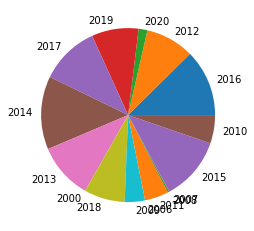

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

%time
spark = SparkSession.builder.appName("Yr_Pie_Chart").getOrCreate()


# Compute the value counts of the 'Yr' column
value_counts = s_df.groupBy("Yr").count()
value_counts_pd=value_counts.toPandas()

# Plot the value counts as a pie chart
plt.pie(value_counts_pd['count'], labels=value_counts_pd['Yr'])
plt.show()

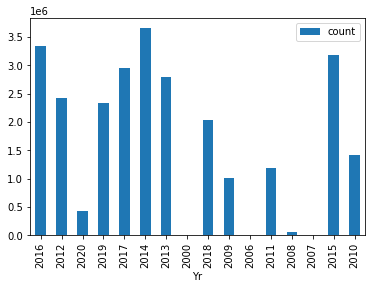

CPU times: user 158 ms, sys: 5.09 ms, total: 163 ms
Wall time: 159 ms


In [ ]:
%%time
value_counts_pd.plot(kind='bar',x='Yr',y='count')
plt.show()

**3. Dask**

In [ ]:
import matplotlib.pyplot as plt
import dask.delayed as delayed
from dask.distributed import Client

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.54 µs


/usr/local/lib/python3.8/dist-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34221 instead
  warnings.warn(


Delayed('AxesSubplot-2ba6a9da-edc5-45ba-84df-b44649badfe5')

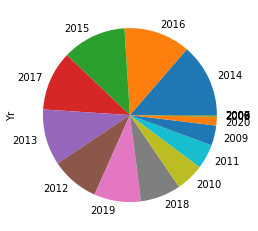

In [ ]:
%time
client = Client()

value_counts = ddf['Yr'].value_counts().compute()

# Plot the value counts as a pie chart
delayed(value_counts.plot.pie())

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


/usr/local/lib/python3.8/dist-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35361 instead
  warnings.warn(


Delayed('AxesSubplot-2dd0e8ac-3649-4337-a35a-428fe04736d3')

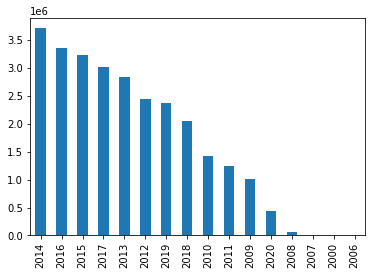

In [ ]:
%time
client = Client()

value_counts = ddf['Yr'].value_counts().compute()

# Plot the value counts as a bar chart
delayed(value_counts.plot.bar())

## Asking and Answering Questions

Before we start asking and answering question, we will import all the library we will use such as matplotlib and pyspark functions.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from pyspark.sql.functions import col,isnan,when,count,sum
from pyspark.sql.functions import desc
from pyspark.sql import functions as F

#### Q1: Which division has the most cars?

**1. Koalas**

In [ ]:
%%time
k_div = kdf.groupby(['Boro'], as_index=False).Vol.sum().sort_values(by='Vol', ascending=False)
k_div

CPU times: user 47.4 ms, sys: 2.24 ms, total: 49.7 ms
Wall time: 225 ms


,Boro,Vol
3,Manhattan,878384457
0,Queens,749302332
1,Brooklyn,652695107
4,Bronx,478183149
2,Staten Island,113746341


/usr/local/lib/python3.8/dist-packages/databricks/koalas/frame.py:4901: FutureWarning:

DataFrame.toPandas is deprecated as of DataFrame.to_pandas. Please use the API instead.



<Figure size 1080x792 with 0 Axes>

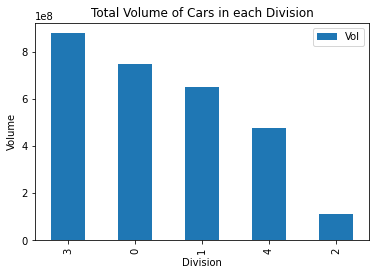

CPU times: user 110 ms, sys: 7.79 ms, total: 118 ms
Wall time: 117 ms


In [ ]:
%%time
#convert the df to pandas
k_div1 = k_div.toPandas()

k_div1.plot(kind='bar')
plt.title('Total Volume of Cars in each Division')
plt.xlabel('Division')
plt.ylabel('Volume')
plt.show()

**2. PySpark**

In [ ]:
%time
py_div = s_df.groupBy("Boro").agg(sum("Vol").alias("Vol"))
py_div = py_div.sort(col("Vol").desc())
py_div.show()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
+-------------+------------+
|         Boro|         Vol|
+-------------+------------+
|    Manhattan|8.78384457E8|
|       Queens|7.49302332E8|
|     Brooklyn|6.52695107E8|
|        Bronx|4.78183149E8|
|Staten Island|1.13746341E8|
+-------------+------------+



CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


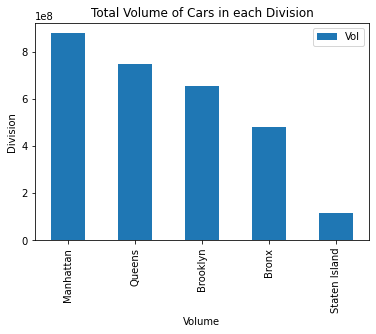

In [ ]:
%time
#convert to pandas
result = py_div.toPandas()

result.plot(kind='bar', x='Boro', y='Vol', legend=True)
plt.xlabel('Volume')
plt.ylabel('Division')
plt.title('Total Volume of Cars in each Division')
plt.show()

**3. Dask**

In [ ]:
%%time
d_div = ddf.groupby('Boro').Vol.sum().compute().reset_index().sort_values(by='Vol', ascending=False)
d_div

CPU times: user 3min 42s, sys: 12.6 s, total: 3min 55s
Wall time: 2min 23s


,Boro,Vol
2,Manhattan,878384457
3,Queens,749302332
1,Brooklyn,652695107
0,Bronx,478183149
4,Staten Island,113746341


CPU times: user 34.3 ms, sys: 5.07 ms, total: 39.4 ms
Wall time: 42.2 ms


<Figure size 1296x648 with 0 Axes>

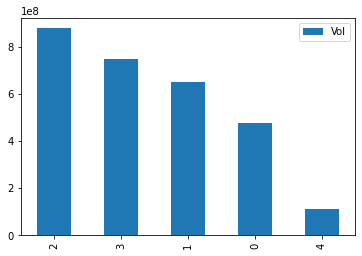

In [ ]:
%%time
plt.figure(figsize=(18, 9))
d_div.compute().plot.bar()

><b>Explaination & Answer</b>

>For the first question, we were asking on which division has the most car and to answer this question, we were using groupby method to group volume of cars to its division. We getting Manhattan has the highest volume of car followed by Queens, Brooklyn, Bronx and Staten Island. Then, we visualized a bar graph to represent the data in a clear and concise manner. The bar graph clearly shows the volume of cars in each division and helps to quickly determine which division has the highest volume. The bar chart also allows for easy comparison of the different divisions and their respective volumes. This information is valuable in understanding the distribution of traffic across the city and could be useful in making decisions regarding infrastructure and transportation planning.

#### Q2: What is the top 3 street that most cars go?

**1. Koalas**

In [ ]:
%%time
k_street = kdf['toSt'].value_counts().sort_values(ascending=False).head(3)
k_street

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


Dead end         2128177
8 Avenue Line     247490
BODY OF WATER     213175
Name: toSt, dtype: int64

In [ ]:
%%time
kdf['toSt'].value_counts().sort_values(ascending=False).head(3).plot.pie(title='Top 3 Street that most Cars Go')

CPU times: user 770 ms, sys: 102 ms, total: 872 ms
Wall time: 1min 42s


**2. PySpark**

In [ ]:
%time
py_street = s_df.groupBy("toSt").agg(count("*").alias("count")).sort(col("count").desc())
py_street.show(3)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.3 µs
+-------------+-------+
|         toSt|  count|
+-------------+-------+
|     Dead end|2128177|
|8 Avenue Line| 247490|
|BODY OF WATER| 213175|
+-------------+-------+
only showing top 3 rows



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


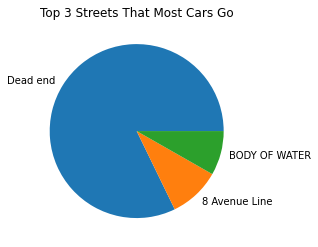

In [ ]:
%time
# Group the data by the 'toSt' column and count the number of occurrences of each value
grouped_data = s_df.groupBy("toSt").agg(count("*").alias("count"))

# Sort the grouped data in descending order by the count
sorted_data = grouped_data.sort(col("count").desc())

# Select the top 3 rows of sorted data
top_3 = sorted_data.limit(3)

# Collect the data to a local Python list
local_data = [row['count'] for row in top_3.collect()]

# Plot the data as a pie chart
import matplotlib.pyplot as plt

labels = [row['toSt'] for row in top_3.collect()]
plt.pie(local_data, labels=labels)
plt.title('Top 3 Streets That Most Cars Go')
plt.show()

**3. Dask**

In [ ]:
%time
d_street = ddf["toSt"].value_counts().nlargest(3)
d_street.compute()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


Dead end         2128177
8 Avenue Line     247490
BODY OF WATER     213175
Name: toSt, dtype: int64

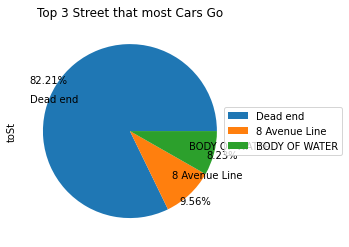

CPU times: user 11min 8s, sys: 8.28 s, total: 11min 17s
Wall time: 6min 49s


In [ ]:
%%time
d_street.compute().plot.pie(autopct = '%.2f%%', pctdistance=1.1, labeldistance=0.7)
plt.legend(d_street.index, loc='right', bbox_to_anchor=(1.5,0.5))
plt.title('Top 3 Street that most Cars Go')
plt.show()

><b>Explaination & Answer</b>

>The second question aimed to determine the top 3 streets that see the highest volume of cars. To answer this question, we counted the number of occurrences of each unique value in the 'toSt' column. After sorting the count in descending order, we selected the top 3 values that have the highest count. Then, we used a pie chart to visualize the results so that we could see the proportion of each street in the top 3 streets. This graphical representation helped us to get a clearer understanding of which streets are more frequently used by cars. By plotting the pie chart, we were able to see the percentage of cars that goes to each of the top 3 streets, giving us a better idea of which streets are more heavily used.

#### Q3: In Brooklyn, what year has the highest count of cars?

**1. Koalas**

In [ ]:
%%time
kdf1 = kdf[kdf['Boro'] == 'Brooklyn']
highest_year = kdf1.groupby('Yr')['Vol'].count().sort_index()
highest_year

CPU times: user 138 ms, sys: 22.9 ms, total: 161 ms
Wall time: 1.2 s


Yr
2007       7035
2008      23172
2009     290675
2010     470595
2011     350288
2012     728596
2013     693686
2014    1090610
2015     700793
2016    1284218
2017    1054104
2018     660024
2019     535372
2020      21120
Name: Vol, dtype: int64

In [ ]:
%%time
highest_year.plot.line(title='Year vs Count of Cars in Brooklyn')

CPU times: user 522 ms, sys: 58.4 ms, total: 581 ms
Wall time: 1min 24s


**2. PySpark**

In [ ]:
%%time
s_df1 = s_df.filter(s_df['Boro'] == 'Brooklyn')
highest_year = s_df1.groupBy("Yr").agg(count("Vol").alias("count")).sort("Yr")
highest_year.show()

+----+-------+
|  Yr|  count|
+----+-------+
|2007|   7035|
|2008|  23172|
|2009| 290675|
|2010| 470595|
|2011| 350288|
|2012| 728596|
|2013| 693686|
|2014|1090610|
|2015| 700793|
|2016|1284218|
|2017|1054104|
|2018| 660024|
|2019| 535372|
|2020|  21120|
+----+-------+

CPU times: user 934 ms, sys: 126 ms, total: 1.06 s
Wall time: 1min 38s


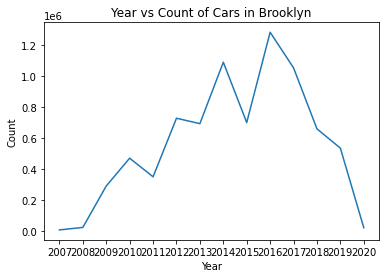

CPU times: user 830 ms, sys: 78.4 ms, total: 908 ms
Wall time: 1min 52s


In [ ]:
%%time
# Extract the year and count columns as lists
years = highest_year.select("Yr").rdd.flatMap(lambda x: x).collect()
counts = highest_year.select("count").rdd.flatMap(lambda x: x).collect()

# Plot the line chart
plt.plot(years, counts)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year vs Count of Cars in Brooklyn")
plt.show()

**3. Dask**

In [ ]:
%%time
ddf1 = ddf[ddf['Boro'] == 'Brooklyn']
highest_year = ddf1.groupby('Yr')['Vol'].count().compute()
highest_year

CPU times: user 3min 44s, sys: 2.91 s, total: 3min 47s
Wall time: 2min 19s


Yr
2007       7035
2008      23172
2009     290675
2010     470595
2011     350288
2012     728596
2013     693686
2014    1090610
2015     700793
2016    1284218
2017    1054104
2018     660024
2019     535372
2020      21120
Name: Vol, dtype: int64

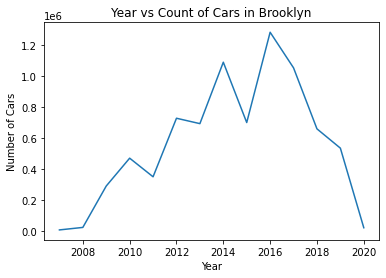

CPU times: user 149 ms, sys: 5.07 ms, total: 154 ms
Wall time: 154 ms


In [ ]:
%%time
highest_year.plot(kind='line')

plt.title('Year vs Count of Cars in Brooklyn')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

><b>Explaination & Answer</b>

>To understand the trend of car volume in Brooklyn over the years, we first filtered the data frame to include only the records where the value of the 'Boro' column is 'Brooklyn'. Next, we used the groupby method to group the data based on the year, which is the 'Yr' column. After that, we counted the number of cars in each year by aggregating the 'Vol' column.

>The result was a series showing the number of cars for each year, sorted in ascending order of the year. To visualize the trend of car volume in Brooklyn, we plotted a line chart to see how the volume changed over the years. The line chart provides a clear visual representation of the growth or decline in car volume in Brooklyn, allowing us to easily identify any patterns or trends in the data. The visual representation makes it easier to comprehend the information and draw insights from the data.

#### Q4: What is the 5 year that has the least request ID?

**1. Koalas**

In [ ]:
%%time
least_request = kdf.groupby(['Yr'])['RequestID'].count().sort_values().head()
least_request

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


Yr
2006       664
2000      1904
2007     11780
2008     68591
2020    439689
Name: RequestID, dtype: int64

In [ ]:
%%time
kdf.groupby(['Yr'])['RequestID'].count().sort_values().head().plot.pie(title='The 5 Year that has the least Request ID')

CPU times: user 589 ms, sys: 61.4 ms, total: 650 ms
Wall time: 1min 28s


**2. PySpark**

In [ ]:
%%time
least_request = s_df.groupBy("Yr").agg(F.count("RequestID").alias("count"))
least_request = least_request.sort("count").limit(5)
least_request.show()

+----+------+
|  Yr| count|
+----+------+
|2006|   664|
|2000|  1904|
|2007| 11780|
|2008| 68591|
|2020|439689|
+----+------+

CPU times: user 1.07 s, sys: 106 ms, total: 1.17 s
Wall time: 3min 20s


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


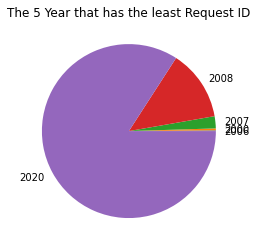

In [ ]:
%time
# Group the data by the 'Yr' column and count the number of occurrences of each value
grouped_data = s_df.groupBy("Yr").agg(F.count("RequestID").alias("count"))

# Sort the grouped data in ascending order by the count
sorted_data = grouped_data.sort(col("count"))

# Select the top 5 rows of sorted data
top_5 = sorted_data.limit(5)

# Collect the data to a local Python list
local_data = [row['count'] for row in top_5.collect()]

# Plot the data as a pie chart
import matplotlib.pyplot as plt

labels = [row['Yr'] for row in top_5.collect()]
plt.pie(local_data, labels=labels)
plt.title('The 5 Year that has the least Request ID')
plt.show()

**3. Dask**

In [ ]:
%%time
least_request = ddf.groupby(['Yr'])['RequestID'].count().compute().sort_values().head()
least_request

CPU times: user 3min 41s, sys: 5.93 s, total: 3min 47s
Wall time: 2min 21s


Yr
2006       664
2000      1904
2007     11780
2008     68591
2020    439689
Name: RequestID, dtype: int64

CPU times: user 3min 41s, sys: 11.5 s, total: 3min 52s
Wall time: 2min 25s


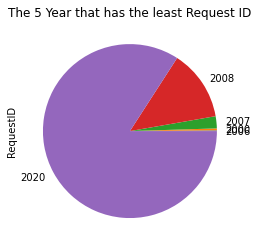

In [ ]:
%%time
ddf.groupby(['Yr'])['RequestID'].count().compute().sort_values().head().plot.pie(title='The 5 Year that has the least Request ID')

><b>Explaination & Answer</b>

>In this fourth question, we aim to understand the years with the lowest count of request IDs in the data. To answer this question, we first utilize the groupby method to group the count of 'RequestID' by year, represented by the column 'Yr'. We then sort the values in ascending order and display the top 5 years with the lowest count of request IDs by using the head method in Koalas and Dask, or the limit method in PySpark. This allows us to have a clear understanding of the 5 years with the lowest count of request IDs. Finally, we use a pie chart to visually display this information, making it easier for us to comprehend the distribution of the least number of request IDs among the 5 years. The pie chart gives us a clearer picture of the proportion of each year compared to the others, allowing us to see the difference in count of request IDs between the 5 years at a glance.

#### Q5: Which direction has the most cars headed to?

**1. Koalas**

In [ ]:
%%time
total_direction = kdf.groupby(['Direction'])['street'].count()
total_direction

CPU times: user 22.5 ms, sys: 4.83 ms, total: 27.4 ms
Wall time: 104 ms


Direction
NS       2964
SB    6915592
EB    6534409
WB    6407041
EW       7390
NB    7004843
Name: street, dtype: int64

/usr/local/lib/python3.8/dist-packages/databricks/koalas/series.py:1525: FutureWarning:

Series.toPandas is deprecated as of Series.to_pandas. Please use the API instead.



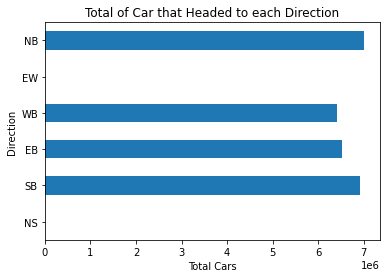

CPU times: user 569 ms, sys: 69.5 ms, total: 638 ms
Wall time: 1min 26s


In [ ]:
%%time
#convert the df to pandas
total_direction1 = total_direction.toPandas()

total_direction1.plot(kind='barh')

plt.title('Total of Car that Headed to each Direction')
plt.xlabel('Total Cars')
plt.ylabel('Direction')
plt.show()

**2. PySpark**

In [ ]:
%%time
total_direction = s_df.groupBy("Direction").agg(count("street").alias("count"))
total_direction.show()

+---------+-------+
|Direction|  count|
+---------+-------+
|       NS|   2964|
|       SB|6915592|
|       EB|6534409|
|       WB|6407041|
|       EW|   7390|
|       NB|7004843|
+---------+-------+

CPU times: user 906 ms, sys: 102 ms, total: 1.01 s
Wall time: 2min 51s


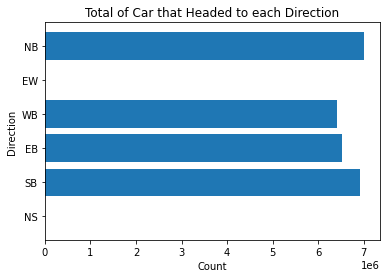

CPU times: user 1.03 s, sys: 93.4 ms, total: 1.12 s
Wall time: 2min 49s


In [ ]:
%%time
labels = [row['Direction'] for row in total_direction.collect()]
counts = [row['count'] for row in total_direction.collect()]

plt.barh(labels, counts)
plt.xlabel("Count")
plt.ylabel("Direction")
plt.title("Total of Car that Headed to each Direction")
plt.show()

**3. Dask**

In [ ]:
%%time
total_direction = ddf.groupby(['Direction'])['street'].count().compute()
total_direction

CPU times: user 3min 43s, sys: 7.37 s, total: 3min 50s
Wall time: 2min 24s


Direction
EB    6534409
EW       7390
NB    7004843
NS       2964
SB    6915592
WB    6407041
Name: street, dtype: int64

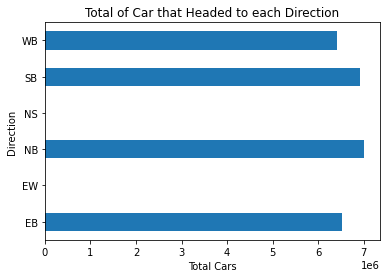

CPU times: user 139 ms, sys: 2.03 ms, total: 141 ms
Wall time: 157 ms


In [ ]:
%%time
total_direction.plot.barh(title='Total of Car that Headed to each Direction')
plt.xlabel('Total Cars')
plt.ylabel('Direction')
plt.show()

><b>Explaination & Answer</b>

>For the last question, we wanted to know what the most common direction of car travel, we used the groupby method to group the 'Direction' column and count the 'street' column. This allowed us to aggregate the data and determine the frequency of each direction. We then plot a barh graph to visualize the output, making it easy to determine the most common direction. By using these techniques, we can generate a clear representation of the most common direction of car travel.

## Inferences and Conclusion 

Koalas, Dask, and PySpark are all tools that can be used for large-scale data processing and analysis.

Koalas is a library that provides a pandas-like API for working with large datasets using Apache Spark. It allows users to perform operations on large datasets using familiar pandas syntax, and it automatically handles the distributed computing and memory management that is required when working with large amounts of data.

Dask is a parallel computing library that can be used to perform parallel and distributed computing on large datasets. It allows users to perform operations on large datasets using familiar numpy and pandas syntax, and it can handle distributed computing and memory management automatically.

PySpark is the Python API for Apache Spark, an open-source, distributed computing system for big data processing. It allows users to perform operations on large datasets using a distributed computing model, and it provides a wide variety of APIs for data processing, machine learning, and graph processing.

In summary, Koalas and Dask are more similar in that they both provide a more familiar API for data processing and analysis, while PySpark is a more general-purpose tool for distributed data processing.

--------------------------------------------------------------------------

Koalas is great for begginers. It is easy to understand and requires little effort. both Koalas and PySpark are based on Spark, one of the fastest distributed computing engines.

Spark is mature and all-inclusive. If you want a single project that does everything and you’re already on Big Data hardware, then Spark is a safe bet, especially if your use cases are typical ETL + SQL and you’re already using Scala.

Dask is lighter weight and is easier to integrate into existing code and hardware. If your problems vary beyond typical ETL + SQL and you want to add flexible parallelism to existing solutions, then Dask may be a good fit, especially if you are already using Python and associated libraries like NumPy and Pandas.

--------------------------------------------------------------------------

Based on the project, we can conclude that Koalas library compute the fastest in the overall tasks. Koalas is the best fit which could process operations many times(100x) faster than Pandas without getting crash. But overall, it all depends on the suitablity to each user.

# Reasons to choose Koalas:
1. Koalas is lazy-evaluated like Spark, i.e., it executes only when triggered by an action.

2. You do not need a separate Spark context/Spark session for processing the Koalas dataframe. Koalas makes use of the existing Spark context/Spark session.

3. Koalas has an SQL API with which you can perform query operations on a Koalas dataframe.

4. By configuring Koalas, you can even toggle computation between Pandas and Spark.

5. Koalas dataframe can be derived from both the Pandas and PySpark dataframes.

# Reasons to choose Pyspark:
(Python is very easy to learn and implement. It provides simple and comprehensive API. With Python, the readability of code, maintenance, and familiarity is far better. It features various options for data visualization, which is difficult using Scala or Java.)

1. You prefer Scala or the SQL language

2. You have mostly JVM infrastructure and legacy systems

3. You want an established and trusted solution for business

4. You are mostly doing business analytics with some lightweight machine learning

5. You want an all-in-one solution

# Reasons to choose Dask:
(Dask is lighter weight and is easier to integrate into existing code and hardware. If your problems vary beyond typical ETL + SQL and you want to add flexible parallelism to existing solutions, then Dask may be a good fit, especially if you are already using Python and associated libraries like NumPy and Pandas.)

1. You prefer Python or native code, or have large legacy code bases that you do not want to entirely rewrite

2. Your use case is complex or does not cleanly fit the Spark computing model

3. You want a lighter-weight transition from local computing to cluster computing

4. You want to interoperate with other technologies and don’t mind installing multiple packages

## References and Future Work

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

https://docs.dask.org/en/stable/spark.html

https://www.machinelearningplus.com/python/dask-tutorial/